In [56]:
# %pip install matplotlib
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

We will create Mel Spectrogram Images for each of the music files.These Mel spectrogram images will be used as INput for Our CNN model

In [2]:


def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = './' + name + '.jpg'
    plt.savefig(filename, dpi=800, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S


For each of the music file I create one image file and store it in the images directory

In [51]:

filesnames=[]
genrenames=[]
for root, dirs, files in os.walk(path):
    for name in files:
        filename = os.path.join(root, name)
        filesnames.append(filename)
        
        genrenames.append(filename.split("/")[3])
try:
    os.mkdir('images')
except FileExistsError as e:
    None
finally:
    None
for name in set(genrenames):
    try:
        os.mkdir("./images/"+name)
    except FileExistsError as e:
        None    

data2/classical/classical.00020.wav
data2/classical/classical.00074.wav
data2/classical/classical.00092.wav
data2/classical/classical.00018.wav
data2/classical/classical.00045.wav
data2/classical/classical.00050.wav
data2/classical/classical.00064.wav
data2/classical/classical.00084.wav
data2/classical/classical.00011.wav
data2/classical/classical.00083.wav
data2/classical/classical.00099.wav
data2/classical/classical.00093.wav
data2/classical/classical.00015.wav
data2/classical/classical.00008.wav
data2/classical/classical.00026.wav
data2/classical/classical.00033.wav
data2/classical/classical.00096.wav
data2/classical/classical.00082.wav
data2/classical/classical.00006.wav
data2/classical/classical.00073.wav
data2/classical/classical.00049.wav
data2/classical/classical.00040.wav
data2/classical/classical.00007.wav
data2/classical/classical.00046.wav
data2/classical/classical.00048.wav
data2/classical/classical.00059.wav
data2/classical/classical.00058.wav
data2/classical/classical.00

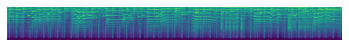

In [6]:
for i in range(len(filesnames)):
    
    genre=genrenames[i]
    filename=filesnames[i]
    endname=filename.split('/')
#     print(endname)
    endname=endname[-1]
#     print(endname)
    pathh="images/"+genre+"/"+endname
    print(pathh)
    create_spectrogram(filename,pathh)

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam

### Loading Image Dataset

In [32]:
BATCH_SIZE=8
TARGET_SIZEX=446  
TARGET_SIZEY=434
NUM_CLASSES=10
image_dataset=image_dataset_from_directory(
  "./images",
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(TARGET_SIZEX, TARGET_SIZEY),
  batch_size=BATCH_SIZE)

Found 947 files belonging to 10 classes.
Using 758 files for training.


In [9]:
val_ds = image_dataset_from_directory(
   "./images",
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(432, 288),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


## Building CNN

In [53]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZEX, TARGET_SIZEY, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES,activation="softmax")
])

In [54]:
model.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



### Training

In [55]:
x=model.fit(
  image_dataset,
  validation_data=val_ds,
  epochs=25,
  verbose=2
)

Epoch 1/25
95/95 - 73s - loss: 2.4737 - accuracy: 0.1741 - val_loss: 2.0040 - val_accuracy: 0.2857
Epoch 2/25
95/95 - 76s - loss: 1.8242 - accuracy: 0.3694 - val_loss: 1.9421 - val_accuracy: 0.3492
Epoch 3/25
95/95 - 76s - loss: 1.5324 - accuracy: 0.4657 - val_loss: 2.0478 - val_accuracy: 0.4233
Epoch 4/25
95/95 - 74s - loss: 1.3429 - accuracy: 0.5277 - val_loss: 1.5210 - val_accuracy: 0.4921
Epoch 5/25
95/95 - 75s - loss: 1.0732 - accuracy: 0.6306 - val_loss: 1.9009 - val_accuracy: 0.4762
Epoch 6/25
95/95 - 75s - loss: 0.7966 - accuracy: 0.7124 - val_loss: 1.7199 - val_accuracy: 0.5397
Epoch 7/25
95/95 - 75s - loss: 0.4902 - accuracy: 0.8522 - val_loss: 1.7797 - val_accuracy: 0.5556
Epoch 8/25
95/95 - 75s - loss: 0.3065 - accuracy: 0.8984 - val_loss: 1.8916 - val_accuracy: 0.5556
Epoch 9/25
95/95 - 75s - loss: 0.1617 - accuracy: 0.9525 - val_loss: 1.6453 - val_accuracy: 0.6085
Epoch 10/25
95/95 - 75s - loss: 0.0743 - accuracy: 0.9776 - val_loss: 1.7210 - val_accuracy: 0.5873
Epoch 11/

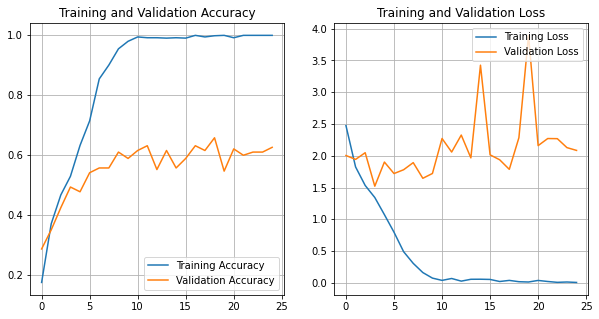

In [63]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()
plot_hist(x)

In [60]:
np.argmax(model.predict(val_ds), axis=-1)

array([1, 3, 1, 2, 6, 7, 7, 0, 6, 2, 9, 4, 6, 6, 4, 9, 7, 4, 8, 8, 1, 0,
       3, 9, 6, 7, 6, 8, 8, 4, 7, 5, 6, 8, 0, 1, 2, 1, 8, 9, 0, 3, 2, 2,
       0, 7, 8, 7, 2, 4, 4, 1, 4, 1, 2, 1, 7, 9, 9, 5, 7, 1, 1, 7, 4, 2,
       0, 4, 8, 7, 9, 1, 1, 9, 9, 8, 3, 9, 8, 0, 0, 7, 3, 1, 1, 6, 1, 6,
       9, 9, 7, 9, 4, 0, 4, 8, 8, 6, 6, 1, 0, 8, 1, 8, 6, 9, 5, 7, 9, 9,
       3, 7, 6, 0, 4, 7, 7, 4, 9, 0, 3, 4, 6, 4, 4, 1, 2, 9, 0, 9, 4, 7,
       8, 9, 8, 8, 6, 4, 8, 9, 9, 3, 5, 6, 9, 4, 0, 4, 1, 1, 1, 4, 4, 6,
       7, 3, 7, 5, 8, 9, 4, 7, 3, 4, 1, 3, 0, 2, 8, 2, 9, 2, 6, 9, 2, 2,
       3, 3, 1, 9, 1, 0, 6, 2, 4, 7, 7, 1, 8])

In [62]:
val_ds.class_names

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']